In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas_profiling
from sklearn.linear_model import LogisticRegression

In [4]:
Path = 'https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/school_grades_scikit_onehot_dataset.csv'

In [5]:
df = pd.read_csv(Path)

In [6]:
df.head()

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,1.0,0.0,18.0,0.0,1.0,1.0,0.0,1.0,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,17.0,0.0,1.0,1.0,0.0,0.0,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,15.0,0.0,1.0,0.0,1.0,0.0,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,15.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [7]:
df.columns

Index(['school_1', 'school_2', 'sex_1', 'sex_2', 'age', 'address_1',
       'address_2', 'famsize_1', 'famsize_2', 'Pstatus_1', 'Pstatus_2', 'Medu',
       'Fedu', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_1',
       'Fjob_2', 'Fjob_3', 'Fjob_4', 'Fjob_5', 'reason_1', 'reason_2',
       'reason_3', 'reason_4', 'guardian_1', 'guardian_2', 'guardian_3',
       'traveltime', 'studytime', 'failures', 'schoolsup_1', 'schoolsup_2',
       'famsup_1', 'famsup_2', 'paid_1', 'paid_2', 'activities_1',
       'activities_2', 'nursery_1', 'nursery_2', 'higher_1', 'higher_2',
       'internet_1', 'internet_2', 'romantic_1', 'romantic_2', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [8]:
df.tail

<bound method NDFrame.tail of      school_1  school_2  sex_1  sex_2   age  address_1  address_2  famsize_1  \
0         1.0       0.0    1.0    0.0  18.0        0.0        1.0        1.0   
1         1.0       0.0    1.0    0.0  17.0        0.0        1.0        1.0   
2         1.0       0.0    1.0    0.0  15.0        0.0        1.0        0.0   
3         1.0       0.0    1.0    0.0  15.0        0.0        1.0        1.0   
4         1.0       0.0    1.0    0.0  16.0        0.0        1.0        1.0   
..        ...       ...    ...    ...   ...        ...        ...        ...   
644       0.0       1.0    1.0    0.0  19.0        1.0        0.0        1.0   
645       0.0       1.0    1.0    0.0  18.0        0.0        1.0        0.0   
646       0.0       1.0    1.0    0.0  18.0        0.0        1.0        1.0   
647       0.0       1.0    0.0    1.0  17.0        0.0        1.0        0.0   
648       0.0       1.0    0.0    1.0  18.0        1.0        0.0        0.0   

     fams

In [9]:
df.tail()

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,0.0,1.0,1.0,0.0,19.0,1.0,0.0,1.0,0.0,0.0,...,5.0,4.0,2.0,1.0,2.0,5.0,4.0,10.0,11.0,10.0
645,0.0,1.0,1.0,0.0,18.0,0.0,1.0,0.0,1.0,0.0,...,4.0,3.0,4.0,1.0,1.0,1.0,4.0,15.0,15.0,16.0
646,0.0,1.0,1.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,5.0,6.0,11.0,12.0,9.0
647,0.0,1.0,0.0,1.0,17.0,0.0,1.0,0.0,1.0,0.0,...,2.0,4.0,5.0,3.0,4.0,2.0,6.0,10.0,10.0,10.0
648,0.0,1.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,...,4.0,4.0,1.0,3.0,4.0,5.0,4.0,10.0,11.0,11.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school_1      649 non-null    float64
 1   school_2      649 non-null    float64
 2   sex_1         649 non-null    float64
 3   sex_2         649 non-null    float64
 4   age           649 non-null    float64
 5   address_1     649 non-null    float64
 6   address_2     649 non-null    float64
 7   famsize_1     649 non-null    float64
 8   famsize_2     649 non-null    float64
 9   Pstatus_1     649 non-null    float64
 10  Pstatus_2     649 non-null    float64
 11  Medu          649 non-null    float64
 12  Fedu          649 non-null    float64
 13  Mjob_1        649 non-null    float64
 14  Mjob_2        649 non-null    float64
 15  Mjob_3        649 non-null    float64
 16  Mjob_4        649 non-null    float64
 17  Mjob_5        649 non-null    float64
 18  Fjob_1        649 non-null    

In [11]:
df.describe()

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.651772,0.348228,0.590139,0.409861,16.744222,0.303544,0.696456,0.704160,0.295840,0.123267,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.476776,0.476776,0.492187,0.492187,1.218138,0.460143,0.460143,0.456771,0.456771,0.328996,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,1.000000,0.000000,1.000000,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
sns.pairplot(df,diag_kind='kde',kind='scatter')

In [12]:
array = df.values

In [13]:
X = array[:,0:58]
Y = array[:,58]

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X,Y)

In [17]:
fit.score_func(X,Y)

(array([6.53346516e+00, 6.53346516e+00, 1.38011067e+00, 1.38011067e+00,
        3.95239784e+00, 2.36001244e+00, 2.36001244e+00, 7.15507068e-01,
        7.15507068e-01, 2.42118860e-01, 2.42118860e-01, 4.44743971e+00,
        4.15775366e+00, 2.76716188e+00, 8.86527154e-01, 9.07211389e-01,
        1.19533001e+00, 1.69028696e+00, 9.80783501e-01, 1.09800478e+00,
        1.26051348e+00, 1.25963655e+00, 1.71221099e+00, 1.83138029e+00,
        1.75632292e+00, 1.87847996e+00, 1.91761658e+00, 1.10819573e+00,
        8.71576674e-01, 9.33064282e-01, 2.33414813e+00, 3.65797827e+00,
        1.30867104e+01, 1.53667812e+00, 1.53667812e+00, 1.22227713e+00,
        1.22227713e+00, 8.77184035e-01, 8.77184035e-01, 1.36182408e+00,
        1.36182408e+00, 1.00864355e+00, 1.00864355e+00, 7.77154973e+00,
        7.77154973e+00, 1.54794041e+00, 1.54794041e+00, 1.06271212e+00,
        1.06271212e+00, 8.13811008e-01, 1.65088542e+00, 1.47206668e+00,
        4.20436083e+00, 2.29805040e+00, 1.55512701e+00, 3.303943

In [19]:
from numpy import set_printoptions
set_printoptions(precision=3)
print(fit.scores_)

[6.533e+00 6.533e+00 1.380e+00 1.380e+00 3.952e+00 2.360e+00 2.360e+00
 7.155e-01 7.155e-01 2.421e-01 2.421e-01 4.447e+00 4.158e+00 2.767e+00
 8.865e-01 9.072e-01 1.195e+00 1.690e+00 9.808e-01 1.098e+00 1.261e+00
 1.260e+00 1.712e+00 1.831e+00 1.756e+00 1.878e+00 1.918e+00 1.108e+00
 8.716e-01 9.331e-01 2.334e+00 3.658e+00 1.309e+01 1.537e+00 1.537e+00
 1.222e+00 1.222e+00 8.772e-01 8.772e-01 1.362e+00 1.362e+00 1.009e+00
 1.009e+00 7.772e+00 7.772e+00 1.548e+00 1.548e+00 1.063e+00 1.063e+00
 8.138e-01 1.651e+00 1.472e+00 4.204e+00 2.298e+00 1.555e+00 3.304e+00
 1.390e+02 2.900e+02]


In [20]:
features = fit.transform(X)
print(features[0:5,:])

[[ 0.  0.  0. 11.]
 [ 0.  0.  9. 11.]
 [ 0.  0. 12. 13.]
 [ 0.  0. 14. 14.]
 [ 0.  0. 11. 13.]]


In [21]:
import pandas as pd
pd.Series(fit.scores_)

0       6.533465
1       6.533465
2       1.380111
3       1.380111
4       3.952398
5       2.360012
6       2.360012
7       0.715507
8       0.715507
9       0.242119
10      0.242119
11      4.447440
12      4.157754
13      2.767162
14      0.886527
15      0.907211
16      1.195330
17      1.690287
18      0.980784
19      1.098005
20      1.260513
21      1.259637
22      1.712211
23      1.831380
24      1.756323
25      1.878480
26      1.917617
27      1.108196
28      0.871577
29      0.933064
30      2.334148
31      3.657978
32     13.086710
33      1.536678
34      1.536678
35      1.222277
36      1.222277
37      0.877184
38      0.877184
39      1.361824
40      1.361824
41      1.008644
42      1.008644
43      7.771550
44      7.771550
45      1.547940
46      1.547940
47      1.062712
48      1.062712
49      0.813811
50      1.650885
51      1.472067
52      4.204361
53      2.298050
54      1.555127
55      3.303943
56    138.994639
57    289.967724
dtype: float64

In [22]:
from sklearn.datasets import load_digits
Feature,Target = load_digits(return_X_y=True)

In [23]:
Feature[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [24]:
Target

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
Feature.shape

(1797, 64)

In [26]:
from sklearn.feature_selection import chi2

In [27]:
X_new = SelectKBest(chi2,k=20).fit_transform(Feature,Target)
X_new.shape

(1797, 20)

In [28]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
df.columns

Index(['school_1', 'school_2', 'sex_1', 'sex_2', 'age', 'address_1',
       'address_2', 'famsize_1', 'famsize_2', 'Pstatus_1', 'Pstatus_2', 'Medu',
       'Fedu', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_1',
       'Fjob_2', 'Fjob_3', 'Fjob_4', 'Fjob_5', 'reason_1', 'reason_2',
       'reason_3', 'reason_4', 'guardian_1', 'guardian_2', 'guardian_3',
       'traveltime', 'studytime', 'failures', 'schoolsup_1', 'schoolsup_2',
       'famsup_1', 'famsup_2', 'paid_1', 'paid_2', 'activities_1',
       'activities_2', 'nursery_1', 'nursery_2', 'higher_1', 'higher_2',
       'internet_1', 'internet_2', 'romantic_1', 'romantic_2', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=3)
model.fit(X,Y)

ExtraTreesClassifier(n_estimators=3)

In [34]:
importance = model.feature_importances_
importance

array([0.009, 0.003, 0.017, 0.015, 0.032, 0.013, 0.018, 0.016, 0.008,
       0.009, 0.009, 0.026, 0.034, 0.007, 0.009, 0.015, 0.01 , 0.008,
       0.008, 0.004, 0.021, 0.017, 0.007, 0.022, 0.018, 0.014, 0.016,
       0.011, 0.019, 0.006, 0.018, 0.02 , 0.019, 0.007, 0.005, 0.014,
       0.015, 0.003, 0.008, 0.015, 0.019, 0.017, 0.015, 0.004, 0.007,
       0.006, 0.011, 0.013, 0.017, 0.019, 0.029, 0.037, 0.015, 0.024,
       0.023, 0.026, 0.078, 0.099])

In [35]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' %(i,v))

Feature: 0, Score: 0.01
Feature: 1, Score: 0.00
Feature: 2, Score: 0.02
Feature: 3, Score: 0.02
Feature: 4, Score: 0.03
Feature: 5, Score: 0.01
Feature: 6, Score: 0.02
Feature: 7, Score: 0.02
Feature: 8, Score: 0.01
Feature: 9, Score: 0.01
Feature: 10, Score: 0.01
Feature: 11, Score: 0.03
Feature: 12, Score: 0.03
Feature: 13, Score: 0.01
Feature: 14, Score: 0.01
Feature: 15, Score: 0.02
Feature: 16, Score: 0.01
Feature: 17, Score: 0.01
Feature: 18, Score: 0.01
Feature: 19, Score: 0.00
Feature: 20, Score: 0.02
Feature: 21, Score: 0.02
Feature: 22, Score: 0.01
Feature: 23, Score: 0.02
Feature: 24, Score: 0.02
Feature: 25, Score: 0.01
Feature: 26, Score: 0.02
Feature: 27, Score: 0.01
Feature: 28, Score: 0.02
Feature: 29, Score: 0.01
Feature: 30, Score: 0.02
Feature: 31, Score: 0.02
Feature: 32, Score: 0.02
Feature: 33, Score: 0.01
Feature: 34, Score: 0.01
Feature: 35, Score: 0.01
Feature: 36, Score: 0.01
Feature: 37, Score: 0.00
Feature: 38, Score: 0.01
Feature: 39, Score: 0.01
Feature: 4

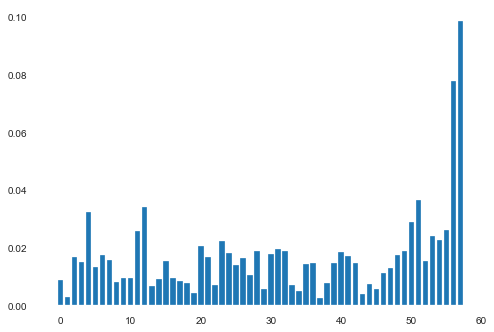

In [36]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()